# Project: Investigating a Dataset - [TMDb movie data]

# By: Azubuike Chibuike Henry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including movie titles, user ratings (on a scale of 1 to 10), casts, directors, revenue and budget for each movie in USD (which were later adjusted due to inflation), movie popularity of each movie, genre (action, adventure, science fiction, and others), production companies and movie runtime (in minutes).

### Question(s) for Analysis
>Research Question 1 (Which movie directors consistently have the most ratings? Or which movie directors have been consistently good?)
>Research Question 2 (Is there any relationship between Budget, Revenue, and Time?)

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling



### Data Inspection
>Here, the data set was read and inspected for further analysis


In [37]:
# Load data 

pd.options.display.max_rows = 9999999

movie_df1 = pd.read_csv('tmdb-movies.csv')


In [38]:
#print out first five (5) rows and perform operations to inspect the given data set.

movie_df = movie_df1.copy()

movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
movie_df.shape

(10866, 21)

In [40]:
#Inspecting the various data types present in the given data set

movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [41]:
#Checking for duplicate data

movie_df.duplicated().sum()

1

In [42]:
#Tracking location of duplicate data

movie_df.loc[movie_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [43]:
#Checking for null cells

movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
 >In the just concluded data inspection, some problems were encountered, and they include:
 
 >1. The presence of too many columns that won't be significant to my analysis
 >2. The presence of a duplicate row
 >3. The presence of null cells
 
 >Solution:
 >1. The excessive and insignificant colunms were dropped in order for me to focus on the important columns
 >2. The duplicate rows were dropped in order to avoid repetitive values which will later affect my analysis
 >3. The null rows were also dropped and not filled because of the kind of data they were to contain. For example, I couldn't use any of the measures of statistical tendencies (mean, median or mode) to fill in '1030 missing Production company names' 

In [44]:
#Dropping off columns that won't be significant to my analysis

movie_df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

movie_df.head()

,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
#Dropping off duplicate row

movie_df.drop_duplicates(inplace=True)

movie_df.shape

(10865, 11)

In [46]:
#Dropping off insignificant null sets

movie_df.dropna(inplace=True)

movie_df.isnull().sum()

original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [47]:
movie_df.shape

(9772, 11)

<a id='eda'></a>
## Exploratory Data Analysis
> Having inspected, trimmed, and cleaned my data set, it was ready to be rexplored via statistical means, visualized, and also inferred upon, with the goal of adressing research questions asked earlier.



### Research Question 1 (Which movie directors consistently have the most ratings? Or which movie directors have been consistently good?)

In [48]:
#Checking for number of Directors

movie_df['director'].nunique()

4505

In [49]:
#Grouping the Directors, checking statistics of their ratings, and the number of movies they've directed within this duration

movie_df.groupby('director')['vote_average'].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
FrÃ©dÃ©ric Jardin,1.0,5.900000,NaN,5.9,5.90,5.9,5.90,5.9
A. Todd Smith,1.0,5.400000,NaN,5.4,5.40,5.4,5.40,5.4
Aaron Blaise|Robert Walker,1.0,6.800000,NaN,6.8,6.80,6.8,6.80,6.8
Aaron Hann|Mario Miscione,1.0,6.100000,NaN,6.1,6.10,6.1,6.10,6.1
Aaron Harvey,1.0,4.900000,NaN,4.9,4.90,4.9,4.90,4.9
Aaron Katz|Martha Stephens,1.0,5.800000,NaN,5.8,5.80,5.8,5.80,5.8
Aaron Keeling|Austin Keeling,1.0,3.800000,NaN,3.8,3.80,3.8,3.80,3.8
Aaron Moorhead|Justin Benson,1.0,6.500000,NaN,6.5,6.50,6.5,6.50,6.5
Aaron Norris,3.0,5.266667,0.404145,4.9,5.05,5.2,5.45,5.7


<a id='eda'></a>
### Analysis
>I could have just picked the Director with the highest movie rating in the data set, but **how do I check for consistently good directors?** 

>It won't be appropraite to just pick the director with the highest movie rating from the given data set (having just 1 or 2 movies), for all we know it might be a 'one time hit'; So in order to check for **consistency**, I decided to pick directors who have directed 10 movies and more, and then I took the mean of ratings of their movies.


In [50]:
#Grouping Directors by the number of movies they've directed within this timeframe, 
#and also the mean of their ratings for all their movies during this timeframe 

directors_df = movie_df.groupby('director').agg({"vote_count":"count", "vote_average":"mean"})

In [51]:
#Sorting this result gotten above for Directors with 10 movies and above

directors_df[directors_df.vote_count >= 10].sort_values("vote_average", ascending=False).head(10)

,vote_count,vote_average
director,,
Quentin Tarantino,10,7.580000
David Fincher,10,7.210000
Joel Coen,10,7.060000
Peter Jackson,13,7.000000
Martin Scorsese,26,6.926923
David Lynch,12,6.866667
Jim Jarmusch,10,6.840000
Steven Spielberg,29,6.824138
Roman Polanski,16,6.793750


In [52]:
#Printing out the first 10 results and storing in a variable

directors_df10 = directors_df[directors_df.vote_count >= 10].sort_values("vote_average", ascending=False).head(10)

directors_df10

,vote_count,vote_average
director,,
Quentin Tarantino,10,7.580000
David Fincher,10,7.210000
Joel Coen,10,7.060000
Peter Jackson,13,7.000000
Martin Scorsese,26,6.926923
David Lynch,12,6.866667
Jim Jarmusch,10,6.840000
Steven Spielberg,29,6.824138
Roman Polanski,16,6.793750


Text(0, 0.5, 'Movie Directors')

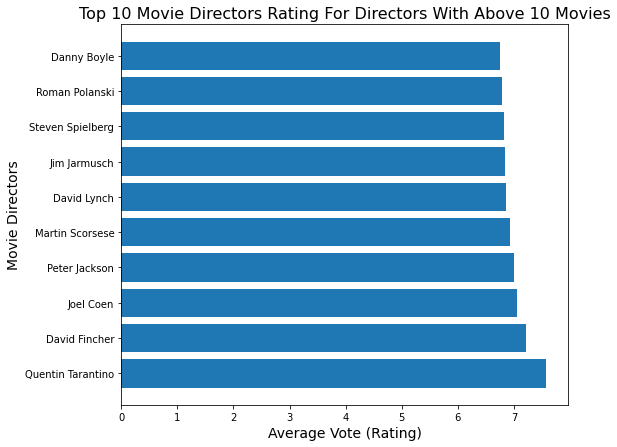

In [53]:
#Plotting a bar chart for the top 10 rated directors

plt.figure(figsize=(8,7))
plt.barh(y=directors_df10.index, width=directors_df10.vote_average)
plt.title('Top 10 Movie Directors Rating For Directors With Above 10 Movies', fontsize=16)
plt.xlabel('Average Vote (Rating)', fontsize=14)
plt.ylabel('Movie Directors', fontsize=14)

<a id='eda'></a>
### Result
>As seen fron the analysis and visualization above, **Quentin Tarantino** is the Director with the most consistent movie rating of **7.58/10**, with over 10 movies directed by him during the considered timeframe. **Consistency!!**

>Let us compare the result obtained above against just picking the director with the highest movie rating from the given data set.

In [54]:
#Statistics of the vote average

movie_df['vote_average'].describe()

count    9772.000000
mean        5.963528
std         0.913174
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

In [55]:
#Movie director with the maximum movie rating from the data set

movie_df[movie_df['vote_average']==movie_df['vote_average'].max()]

,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
6911,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006,0.0,0.0


<a id='eda'></a>
### Comparison
>As seen, the max rating of **8.70/10** was gotten by **David Mallet** (with one directed movie within this timeframe), but when a proper analysis was conducted, he wasn't among the top 10 consistent directors.

### Research Question 2  (Is there any relationship between Budget, Revenue, and Time?)

<a id='eda'></a>
### Movie with the most generated revenue

In [56]:
#Checking the year range or timeframe for this analysis (1960 to 2015)

movie_df['release_year'].describe()

count    9772.000000
mean     2000.878428
std        13.036794
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

In [57]:
#The maximum revenue generated within this timeframe (in USD$)

movie_df['revenue_adj'].max()

2827123750.41189

In [58]:
#The movie that yielded the most revenue within this timeframe

movie_df[movie_df['revenue_adj']==movie_df['revenue_adj'].max()]

,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09



**As seen above, the movie with the highest generated revenue during this period was Avatar, having a revenue of 2.8 Trillion USD**



<a id='eda'></a>
### How much money did these movies spend and earn ?
>To do this, I had to carry out a single variable analysis on **Budget** and **Revenue**

In [59]:
movie_df.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


**For this particular analysis, data sets with missing (or zero) Budget and Revenue were dropped**

In [60]:
#Picking out data with missing budgets and revenue from the original data set

movie_df[(movie_df.budget_adj==0) & (movie_df.revenue_adj==0) ].head()

,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.0,0.0
75,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0.0,0.0
92,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0.0,0.0
100,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015,0.0,0.0
101,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,161,5.4,2015,0.0,0.0


In [61]:
movie_df2 = movie_df[(movie_df.budget_adj==0) & (movie_df.revenue_adj==0)]

#Dropping off these missing data
movie_df2 = movie_df.drop(movie_df2.index)

In [62]:
movie_df2.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5966.000000,5966.000000,5966.000000,5966.000000,5.966000e+03,5.966000e+03
mean,106.855515,366.932283,6.048039,2000.830707,3.180239e+07,9.345002e+07
std,22.871738,742.749012,0.858724,11.993900,4.110677e+07,1.848522e+08
min,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,93.000000,34.000000,5.500000,1994.000000,2.849233e+06,2.695715e+05
50%,103.000000,104.000000,6.100000,2004.000000,1.718542e+07,2.549925e+07
75%,116.000000,339.000000,6.600000,2010.000000,4.326677e+07,9.931378e+07
max,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
def histogram_plot(col, label):
    '''This function takes in a particular colomn from the dataset and a label as inputs, and it outputs a histogram plot for that column'''
    plt.title(f'Histogram plot for {label}', fontsize=14)
    plt.xlabel(f'{label} (USD)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.hist(movie_df2[col])
    plt.show()

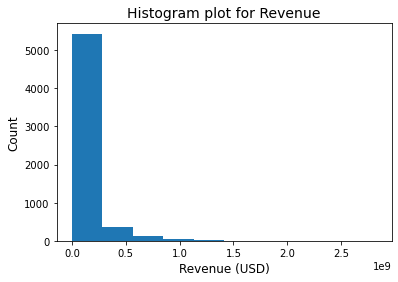

In [64]:
#Histogram plot for Revenue

histogram_plot('revenue_adj', 'Revenue')

**The chart above shows that the data is skewed to the right because of movies like AVATAR that have an out of the ordinary revenue.**
**It also shows that most movies did not go beyond a REVENUE of 200 million USD**

**Similar analysis carried out on Budget reveals:**

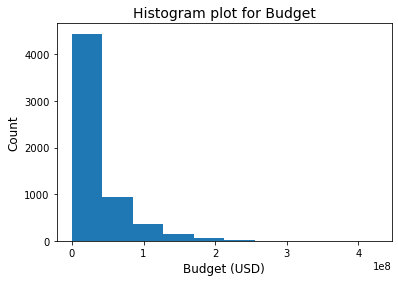

In [65]:
#Histogram plot for Budget

histogram_plot('budget_adj', 'Budget')

**The chart above shows that the data is also skewed to the right and indicates that most movies did not SPEND beyond 60 million USD on production**

**Further analysis was carried out to find out if there exists any RELATIONSHIP BETWEEN BUDGET, REVENUE, and RELEASE YEAR... Like how did the release year affect the movie budget?**

In [66]:
#Smoothening data to be plotted

movie_df_ma = movie_df.groupby('release_year').sum().rolling(10).mean()

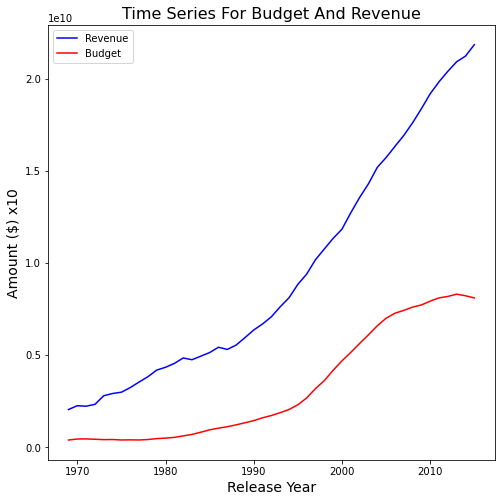

In [67]:
#Plotting a time series graph for budget and revenue

plt.figure(figsize=(8,8))
plt.plot(movie_df_ma.index, movie_df_ma.revenue_adj, color='blue', label='Revenue')
plt.plot(movie_df_ma.index, movie_df_ma.budget_adj, color='red', label='Budget')
plt.title('Time Series For Budget And Revenue', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Amount ($) x10', fontsize=14)
plt.legend()
plt.show()


<a id='eda'></a>
### Relationship between Time, Budget, and Revenue
>As seen from the chart above, there's been a huge and steady increase in budget of movie production from around 1996.

>Personally, I would say this was expected due to inflation, and also due to increase and advancement in technology to make production better (quality sound, clearer video quality, studio effects, costumes, and so on); and of course this also led to a massive increase in revenue generated from these movies over this period of time.

>**So YES, TIME did have an effect on movie budget and revenue.**

<a id='conclusions'></a>
## Conclusions

> From Research Question 1: The quest here was to find not just the Director with the maximum movie rating from the data set, but to also find the **top most consistent Directors** over this period of time, and it was seen that **Quentin Tarantino** was the Director with the most consistent movie rating of **7.58/10**, and with over 10 movies directed by him during the considered timeframe, with the likes of David Fincher and Joel Coen following suit. Meanwhile, the maximum rating of **8.70/10** was gotten by **David Mallet** (with one directed movie within this timeframe), but when a proper analysis was conducted, he wasn't among the top 10 consistent directors. 

> From Research Question 2: The movie with the highest generated revenue was **Avatar**, with **2.8 Trillion Dollars** generated within this period.
>More so, the Histogram plot for Revenue and Budget were both skewed to the right, and showed that most of the movies were produced with a budget beyond **60 million USD**, and also most of the movies did not generate a revenue beyond **200 million USD**.

> Further research in Question 2 showed that there was a huge and steady increase in budget of movie production from around 1996, which was expected due to inflation, and also due to increase and advancement in technology to make production better (quality sound, clearer video quality, studio effects, costumes, and so on); and this in turn led to a massive increase in revenue generated from these movies over this period of time; meaning that **TIME did have an effect on movie budget and revenue.**


>Additional research could be carried out on what genre of movies are the most popular? and also what kind of properties are associated with movies that have high revenue?


### Limitation
> A mojor limitation to this analysis was the presence of incomplete or null data that I couldn't fill at a glance or using any of the measures of central tendencies like mean, median or mode due to the type of string data that was to be contained in these cells, for example missing company names or casts, or directors and so on.

>This made me loose over a thousand (1000) rows of data after cleaning, which should have otherwise guaranteed more concrete results.  


In [ ]:
from subprocess import call
call(['jupyter-nbconvert' ,'--execute','--to','webpdf','--allow-chromium-download','Investigate_a_Dataset.ipynb'])